In [1]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Market_Basket_Optimisation.csv", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Exploration

In [3]:
# 1. Gather All Items of Each Transactions into Numpy Array
transaction = []
for i in range(0, data.shape[0]):
    for j in range(0, data.shape[1]):
        transaction.append(data.values[i,j])
transaction = np.array(transaction)
# 2. Transform Them a Pandas DataFrame
df = pd.DataFrame(transaction, columns=["items"]) 

df["incident_count"] = 1 # Put 1 to Each Item For Making Countable Table, to be able to perform Group By

# 3. Delete NaN Items from Dataset
indexNames = df[df['items'] == "nan" ].index
df.drop(indexNames , inplace=True)

# 4. Final Step: Make a New Appropriate Pandas DataFrame
df_table = df.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()

In [4]:
df_table.head(10).style.background_gradient(cmap='Blues')

,items,incident_count
0,mineral water,1788
1,eggs,1348
2,spaghetti,1306
3,french fries,1282
4,chocolate,1230
5,green tea,991
6,milk,972
7,ground beef,737
8,frozen vegetables,715
9,pancakes,713


In [5]:
import plotly.express as px

# to have a same origin
df_table["all"] = "all" 

# creating tree map using plotly
fig = px.treemap(df_table.head(30), path=['all', "items"], values='incident_count',
                  color=df_table["incident_count"].head(30), hover_data=['items'],
                  color_continuous_scale='blues',
                )
# ploting the treemap
fig.show()

C:\Users\aksha\AppData\Local\Programs\Python\Python39\lib\site-packages\plotly\express\_core.py:1637: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)
C:\Users\aksha\AppData\Local\Programs\Python\Python39\lib\site-packages\plotly\express\_core.py:1637: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)


# Data Preprocessing

In [6]:
# Transform Every Transaction to Seperate List & Gather Them into Numpy Array

transaction = []
for i in range(data.shape[0]):
    transaction.append([str(data.values[i,j]) for j in range(data.shape[1])])
    
transaction = np.array(transaction)
transaction

## Every trnasaction is in on list and combination of list is put in NP array

array([['shrimp', 'almonds', 'avocado', ..., 'frozen smoothie',
        'spinach', 'olive oil'],
       ['burgers', 'meatballs', 'eggs', ..., 'nan', 'nan', 'nan'],
       ['chutney', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ...,
       ['chicken', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ['escalope', 'green tea', 'nan', ..., 'nan', 'nan', 'nan'],
       ['eggs', 'frozen smoothie', 'yogurt cake', ..., 'nan', 'nan',
        'nan']], dtype='<U20')

In [7]:
te = TransactionEncoder()
te_ary = te.fit(transaction).transform(transaction)
dataset = pd.DataFrame(te_ary, columns=te.columns_)
dataset

##True False

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
first50 = df_table["items"].head(50).values # Select Top50
dataset = dataset.loc[:,first50] # Extract Top50
dataset

,mineral water,eggs,spaghetti,french fries,chocolate,green tea,milk,ground beef,frozen vegetables,pancakes,...,ham,energy bar,energy drink,pepper,vegetables mix,cereals,muffins,oil,french wine,fresh tuna
0,True,False,False,False,False,True,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,True,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,True,False,True,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
dataset.columns

Index(['mineral water', 'eggs', 'spaghetti', 'french fries', 'chocolate',
       'green tea', 'milk', 'ground beef', 'frozen vegetables', 'pancakes',
       'burgers', 'cake', 'cookies', 'escalope', 'low fat yogurt', 'shrimp',
       'tomatoes', 'olive oil', 'frozen smoothie', 'turkey', 'chicken',
       'whole wheat rice', 'grated cheese', 'cooking oil', 'soup',
       'herb & pepper', 'honey', 'champagne', 'fresh bread', 'salmon',
       'brownies', 'avocado', 'hot dogs', 'cottage cheese', 'tomato juice',
       'butter', 'whole wheat pasta', 'red wine', 'yogurt cake', 'light mayo',
       'ham', 'energy bar', 'energy drink', 'pepper', 'vegetables mix',
       'cereals', 'muffins', 'oil', 'french wine', 'fresh tuna'],
      dtype='object')

In [10]:
# Encoding


def encode_units(x):
    if x == False:
        return 0 
    if x == True:
        return 1
    
dataset = dataset.applymap(encode_units)
dataset.head(10)

,mineral water,eggs,spaghetti,french fries,chocolate,green tea,milk,ground beef,frozen vegetables,pancakes,...,ham,energy bar,energy drink,pepper,vegetables mix,cereals,muffins,oil,french wine,fresh tuna
0,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Apriori Algorithm

In [11]:
# Extracting the most frequest itemsets via Mlxtend.

# min support - just to avoid the products which is very lesss occuring ( for 1-2 times in complete dataset )

frequent_itemsets = apriori(dataset, min_support=0.01, use_colnames=True) ## to generate itemset

# The length column has been added to increase ease of filtering.

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.179709,(eggs),1
2,0.174110,(spaghetti),1
3,0.170911,(french fries),1
4,0.163845,(chocolate),1
...,...,...,...
227,0.010932,"(mineral water, chocolate, ground beef)",3
228,0.011065,"(mineral water, milk, ground beef)",3
229,0.011065,"(milk, mineral water, frozen vegetables)",3
230,0.010532,"(eggs, spaghetti, chocolate)",3


In [12]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.04)]

,support,itemsets,length
50,0.050927,"(eggs, mineral water)",2
51,0.059725,"(mineral water, spaghetti)",2
53,0.052660,"(mineral water, chocolate)",2
55,0.047994,"(mineral water, milk)",2
56,0.040928,"(mineral water, ground beef)",2


In [13]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
1,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
2,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
3,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
4,(mineral water),(milk),0.238368,0.129583,0.047994,0.201342,1.553774,0.017105,1.089850
...,...,...,...,...,...,...,...,...,...
343,"(chocolate, milk)",(spaghetti),0.032129,0.174110,0.010932,0.340249,1.954217,0.005338,1.251821
344,"(spaghetti, chocolate)",(milk),0.039195,0.129583,0.010932,0.278912,2.152382,0.005853,1.207088
345,(milk),"(spaghetti, chocolate)",0.129583,0.039195,0.010932,0.084362,2.152382,0.005853,1.049329
346,(spaghetti),"(chocolate, milk)",0.174110,0.032129,0.010932,0.062787,1.954217,0.005338,1.032712


In [14]:
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("lift",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
218,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860,1,1
219,(ground beef),(herb & pepper),0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.135410,1,1
288,"(mineral water, spaghetti)",(ground beef),0.059725,0.098254,0.017064,0.285714,2.907928,0.011196,1.262445,2,1
293,(ground beef),"(mineral water, spaghetti)",0.098254,0.059725,0.017064,0.173677,2.907928,0.011196,1.137902,1,2
311,(olive oil),"(mineral water, spaghetti)",0.065858,0.059725,0.010265,0.155870,2.609786,0.006332,1.113898,1,2
...,...,...,...,...,...,...,...,...,...,...,...
61,(low fat yogurt),(eggs),0.076523,0.179709,0.016798,0.219512,1.221484,0.003046,1.050997,1,1
165,(green tea),(shrimp),0.132116,0.071457,0.011465,0.086781,1.214449,0.002025,1.016780,1,1
164,(shrimp),(green tea),0.071457,0.132116,0.011465,0.160448,1.214449,0.002025,1.033747,1,1
123,(escalope),(french fries),0.079323,0.170911,0.016398,0.206723,1.209537,0.002841,1.045145,1,1


In [15]:
# Sort values based on confidence

rules.sort_values("confidence",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
267,"(eggs, ground beef)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848,2,1
326,"(milk, ground beef)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552,2,1
320,"(chocolate, ground beef)",(mineral water),0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937,2,1
331,"(frozen vegetables, milk)",(mineral water),0.023597,0.238368,0.011065,0.468927,1.967236,0.005440,1.434136,2,1
34,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,1,1
...,...,...,...,...,...,...,...,...,...,...,...
321,(mineral water),"(chocolate, ground beef)",0.238368,0.023064,0.010932,0.045861,1.988472,0.005434,1.023893,1,2
48,(mineral water),(cereals),0.238368,0.025730,0.010265,0.043065,1.673729,0.004132,1.018115,1,1
309,(mineral water),"(spaghetti, olive oil)",0.238368,0.022930,0.010265,0.043065,1.878079,0.004799,1.021041,1,2
270,(mineral water),"(eggs, ground beef)",0.238368,0.019997,0.010132,0.042506,2.125563,0.005365,1.023507,1,2


In [16]:
rules[rules["antecedents"].str.contains("ground beef", regex=False) & rules["antecedents_length"] == 1].sort_values("confidence", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
7,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,1,1
75,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,1,1
129,(ground beef),(chocolate),0.098254,0.163845,0.023064,0.234735,1.432669,0.006965,1.092635,1,1
175,(ground beef),(milk),0.098254,0.129583,0.021997,0.223881,1.727704,0.009265,1.121499,1,1
293,(ground beef),"(mineral water, spaghetti)",0.098254,0.059725,0.017064,0.173677,2.907928,0.011196,1.137902,1,2
205,(ground beef),(frozen vegetables),0.098254,0.095321,0.016931,0.172320,1.807796,0.007565,1.093031,1,1
219,(ground beef),(herb & pepper),0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.135410,1,1
207,(ground beef),(pancakes),0.098254,0.095054,0.014531,0.147897,1.555925,0.005192,1.062015,1,1
214,(ground beef),(olive oil),0.098254,0.065858,0.014131,0.143826,2.183889,0.007661,1.091066,1,1
209,(ground beef),(burgers),0.098254,0.087188,0.011998,0.122117,1.400607,0.003432,1.039787,1,1


In [17]:
rules[~rules["consequents"].str.contains("mineral water", regex=False) & 
      ~rules["antecedents"].str.contains("mineral water", regex=False)].sort_values("confidence", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
75,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,1,1
111,(red wine),(spaghetti),0.028130,0.174110,0.010265,0.364929,2.095966,0.005368,1.300468,1,1
89,(olive oil),(spaghetti),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048,1,1
343,"(chocolate, milk)",(spaghetti),0.032129,0.174110,0.010932,0.340249,1.954217,0.005338,1.251821,2,1
56,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818,1,1
104,(herb & pepper),(spaghetti),0.049460,0.174110,0.016264,0.328841,1.888695,0.007653,1.230543,1,1
218,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860,1,1
337,"(eggs, chocolate)",(spaghetti),0.033196,0.174110,0.010532,0.317269,1.822232,0.004752,1.209686,2,1
109,(salmon),(spaghetti),0.042528,0.174110,0.013465,0.316614,1.818472,0.006060,1.208527,1,1
99,(grated cheese),(spaghetti),0.052393,0.174110,0.016531,0.315522,1.812196,0.007409,1.206597,1,1


## Visualizing Results

### Support vs Confidence

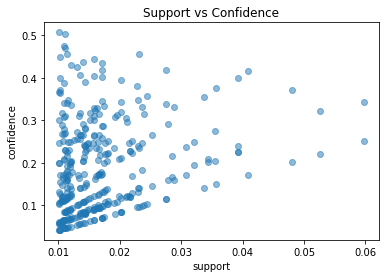

In [18]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

### Support vs Lift

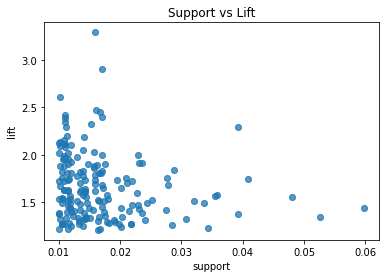

In [19]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

### Lift vs Confidence

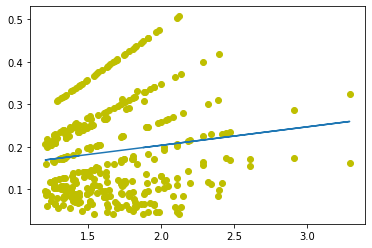

In [20]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

# FP Growth Algorithm

In [21]:
import numpy as np
dataset = pd.read_csv("Market_Basket_Optimisation.csv", header=None)

# Gather All Items of Each Transactions into Numpy Array
transaction = []
for i in range(0, dataset.shape[0]):
    for j in range(0, dataset.shape[1]):
        transaction.append(dataset.values[i,j])

# converting to numpy array
transaction = np.array(transaction)
print(transaction)

['shrimp' 'almonds' 'avocado' ... 'nan' 'nan' 'nan']


In [22]:
# Transform Every Transaction to Seperate List & Gather Them into Numpy Array
transaction = []
for i in range(dataset.shape[0]):
    transaction.append([str(dataset.values[i,j]) for j in range(dataset.shape[1])])

# creating the numpy array of the transactions
transaction = np.array(transaction)

# importing the required module
from mlxtend.preprocessing import TransactionEncoder

# initializing the transactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transaction).transform(transaction)
dataset = pd.DataFrame(te_ary, columns=te.columns_)

# dataset after encoded
dataset.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [23]:
# select top 30 items
first30 = df_table["items"].head(30).values 

# Extract Top 30
dataset = dataset.loc[:,first30] 

# shape of the dataset
dataset.shape

(7501, 30)

In [24]:
#Importing Libraries
from mlxtend.frequent_patterns import fpgrowth

#running the fpgrowth algorithm
res=fpgrowth(dataset,min_support=0.05, use_colnames=True)

# printing top 10
res.head(10)

,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
5,0.063325,(frozen smoothie)
6,0.179709,(eggs)
7,0.087188,(burgers)
8,0.062525,(turkey)
9,0.129583,(milk)


In [25]:
# importing required module
from mlxtend.frequent_patterns import association_rules

# creating asssociation rules
res=association_rules(res, metric="lift", min_threshold=1)

# printing association rules
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
1,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158
2,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
3,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
4,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
5,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357


In [26]:
# Sort values based on confidence
res.sort_values("confidence",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
5,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
0,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
2,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
4,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
1,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158


## Visualizing Results

### Support vs Confidence

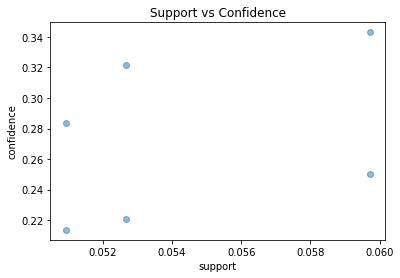

In [27]:
plt.scatter(res['support'], res['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

### Support vs Lift

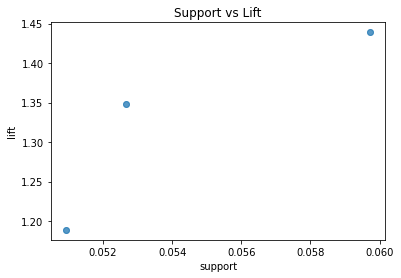

In [28]:
plt.scatter(res['support'], res['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

### Lift vs Confidence

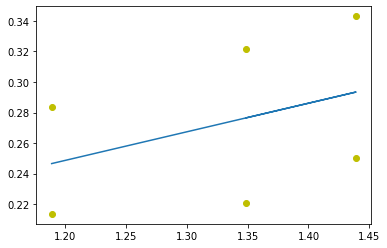

In [29]:
fit = np.polyfit(res['lift'], res['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(res['lift'], res['confidence'], 'yo', res['lift'], 
 fit_fn(res['lift']))

In [30]:
data = pd.read_csv("Market_Basket_Optimisation.csv", header=None)
data.head()

df = data.transpose()


In [31]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,7491,7492,7493,7494,7495,7496,7497,7498,7499,7500
0,shrimp,burgers,chutney,turkey,mineral water,low fat yogurt,whole wheat pasta,soup,frozen vegetables,french fries,...,herb & pepper,chocolate,burgers,turkey,pancakes,butter,burgers,chicken,escalope,eggs
1,almonds,meatballs,NaN,avocado,milk,NaN,french fries,light cream,spaghetti,NaN,...,NaN,escalope,salmon,burgers,light mayo,light mayo,frozen vegetables,NaN,green tea,frozen smoothie
2,avocado,eggs,NaN,NaN,energy bar,NaN,NaN,shallot,green tea,NaN,...,NaN,NaN,pancakes,dessert wine,NaN,fresh bread,eggs,NaN,NaN,yogurt cake
3,vegetables mix,NaN,NaN,NaN,whole wheat rice,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,french fries,shrimp,NaN,NaN,french fries,NaN,NaN,low fat yogurt
4,green grapes,NaN,NaN,NaN,green tea,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,frozen smoothie,pasta,NaN,NaN,magazines,NaN,NaN,NaN


In [32]:
ct = pd.Series(df.count())
ct

0       20
1        3
2        1
3        2
4        5
        ..
7496     3
7497     6
7498     1
7499     2
7500     4
Length: 7501, dtype: int64

In [33]:
l1 = []
for col in df:
    l1.append(df[col].unique())

ctt = list(df.count())

l = list(range(1,len(ctt)+1))

Transaction_Count = pd.DataFrame(
    { 'Transaction_Id' : l , 'Items' : l1 })

print(Transaction_Count)

      Transaction_Id                                              Items
0                  1  [shrimp, almonds, avocado, vegetables mix, gre...
1                  2                    [burgers, meatballs, eggs, nan]
2                  3                                     [chutney, nan]
3                  4                             [turkey, avocado, nan]
4                  5  [mineral water, milk, energy bar, whole wheat ...
...              ...                                                ...
7496            7497             [butter, light mayo, fresh bread, nan]
7497            7498  [burgers, frozen vegetables, eggs, french frie...
7498            7499                                     [chicken, nan]
7499            7500                         [escalope, green tea, nan]
7500            7501  [eggs, frozen smoothie, yogurt cake, low fat y...

[7501 rows x 2 columns]


In [34]:
from pyECLAT import ECLAT
eclat = ECLAT(data=data)
eclat.df_bin



,sandwich,ham,clothes accessories,bug spray,mashed potato,sparkling water,shallot,dessert wine,green grapes,gluten free bar,...,almonds,pickles,pet food,chocolate,flax seed,brownies,whole wheat rice,cauliflower,hand protein bar,shrimp
0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
items_total = eclat.df_bin.astype(int).sum(axis=0)

items_total

sandwich                34
ham                    199
clothes accessories     63
bug spray               65
mashed potato           31
                      ... 
brownies               253
whole wheat rice       439
cauliflower             36
hand protein bar        39
shrimp                 536
Length: 120, dtype: int64

# Vertical Data Format

In [36]:
dfTr = eclat.df_bin

cols = ''
l1 = []


for j in range (len(dfTr.columns)):
    for i in range (dfTr.shape[0]):
        if(dfTr[dfTr.columns[j]][i]==1):
            cols+=str(i+1)
            cols+=','
    l1.append(str(cols))
    cols=''

l = list(dfTr.columns)

Transaction_Count = pd.DataFrame(
    { 'Item' : l , 'Transactions' : l1 })

print(Transaction_Count)

                    Item                                       Transactions
0               sandwich  274,372,534,676,762,820,930,1142,1862,2076,243...
1                    ham  23,96,97,104,177,199,259,339,457,462,463,473,4...
2    clothes accessories  47,62,246,667,783,1020,1106,1120,1152,1262,131...
3              bug spray  48,64,108,205,534,716,783,793,863,919,1065,107...
4          mashed potato  139,325,430,480,588,784,882,887,1354,1608,1866...
..                   ...                                                ...
115             brownies  46,51,142,152,200,213,237,316,387,488,642,684,...
116     whole wheat rice  5,42,68,147,151,178,184,188,225,229,299,345,36...
117          cauliflower  409,470,936,986,1080,1835,2304,2383,2408,2473,...
118     hand protein bar  271,790,974,1039,1040,1049,1074,1336,1473,1562...
119               shrimp  1,17,21,24,70,92,108,109,111,126,143,144,150,1...

[120 rows x 2 columns]


In [37]:
items_per_transaction = eclat.df_bin.astype(int).sum(axis=1)

items_per_transaction

# the item shoud appear at least at 5% of transactions
min_support = 5/100

# start from transactions containing at least 2 items
min_combination = 2

# up to maximum items per transaction
max_combination = 5

rule_indices, rule_supports = eclat.fit(min_support=min_support,
                                                 min_combination=min_combination,
                                                 max_combination=max_combination,
                                                 separator=' & ',
                                                 verbose=True)

Combination 2 by 2


300it [00:01, 213.59it/s]


Combination 3 by 3


2300it [00:09, 248.56it/s]


Combination 4 by 4


12650it [00:52, 241.86it/s]


Combination 5 by 5


53130it [03:35, 246.37it/s]


In [38]:
result = pd.DataFrame(rule_supports.items(),columns=['Item', 'Support'])
result.sort_values(by=['Support'], ascending=False)

,Item,Support
1,spaghetti & mineral water,0.059725
2,mineral water & chocolate,0.052660
0,eggs & mineral water,0.050927
